# FASHION_MNIST DATASET

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.
Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot 

In [7]:
import pandas as pd
import numpy as np
import random as rd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


In [3]:
fashion = pd.read_csv("/Users/Juliet Anene/Documents/fashion-mnist_train.csv")

In [4]:
fashion.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion.shape

(60000, 785)

we would only use a fraction of the entiree dataset for this exercise

In [8]:
fashion = fashion.sample(frac=0.3).reset_index(drop=True)
fashion.shape

(18000, 785)

In [9]:
fashion.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,2,1,1,0,0,0,0,...,122,110,120,5,0,2,0,0,0,0
1,0,0,0,0,0,0,0,0,2,0,...,116,51,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,44,...,2,0,18,39,0,28,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,1,2,0,...,1,0,0,0,0,5,38,0,0,0


Define the labels by creating a library

We attached actual labels(items) to code 1 to 9

In [11]:
LOOKUP = {0: "T-shirt",
         1: "Trouser",
         2: "Pullover",
         3: "Dress",
         4: "Coat",
         5: "Sandal",
         6: "Shirt",
         7: "Sneaker",
         8: "Bag",
         9: "Ankle boot"}

We will use our features(pixels) to determine actual lables(items). The plt.imshow print out a single image in 28 by 28 which comprises of the 785 grid scales as seen earlier

In [12]:
def display_image(features, actual_label):
    print("Actual label: ", LOOKUP[actual_label])
    
    plt.imshow(features.reshape(28,28))

In [13]:
x = fashion[fashion.columns[1:]]
y = fashion["label"]

for x, put all the columns in our dataset into x without the first column(item label). This act as our model features.
for y, put only the fashion item labels to train our model

In [14]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,2,1,1,0,0,0,0,26,...,122,110,120,5,0,2,0,0,0,0
1,0,0,0,0,0,0,0,2,0,0,...,116,51,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,44,220,...,2,0,18,39,0,28,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,2,0,0,...,1,0,0,0,0,5,38,0,0,0


In [15]:
y.head()

0    0
1    0
2    2
3    8
4    4
Name: label, dtype: int64

In [16]:
x.loc[5].values[:100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   2,   0,
         6,   0,   0,   0,   0,  10,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   0,   0,   0,  80,  79,   6,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,  89, 185, 151, 150, 191,  83,   0,   6,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   5,   0,  62, 179,  33,   0], dtype=int64)

In [17]:
y.loc[5]

8

Actual label:  Bag


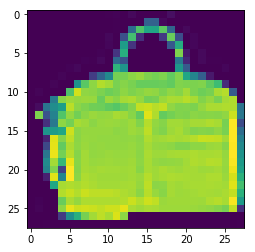

In [18]:
display_image(x.loc[5].values, y.loc[5])

In [20]:
y.head(10)

0    0
1    0
2    2
3    8
4    4
5    8
6    2
7    1
8    0
9    6
Name: label, dtype: int64

In [21]:
x.loc[567].values[:100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 111, 128, 113,
       114, 116, 127, 134, 141, 153,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249,
       233, 245, 248, 254, 248, 229, 229, 255,  74,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 244, 213, 203, 205, 210, 209, 203, 202, 238,  90,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  54, 250, 202, 213, 210, 214, 212], dtype=int64)

Actual label:  Trouser


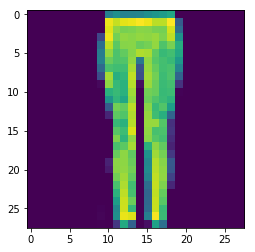

In [22]:
display_image(x.loc[567].values, y.loc[567])

note all the images are 28 by 28 .

Actual label:  Dress


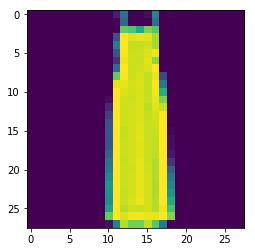

In [23]:
display_image(x.loc[15088].values, y.loc[15088])

Now i would scale my numerical data to only intensity between 0 and 1. i would divide each of my pixel withh 255 max number of intensity.

In [24]:
x = x/255
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.007843,0.003922,0.003922,0.0,0.000000,0.000000,0.000000,0.101961,...,0.478431,0.431373,0.470588,0.019608,0.0,0.007843,0.00000,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.007843,0.000000,0.000000,...,0.454902,0.200000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.172549,0.862745,...,0.007843,0.000000,0.070588,0.152941,0.0,0.109804,0.00000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.003922,0.007843,0.000000,0.000000,...,0.003922,0.000000,0.000000,0.000000,0.0,0.019608,0.14902,0.0,0.0,0.0


Now we split our data into train and test set. Use 80% to train and 20% to test the accuracy of our model.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [26]:
x_train.shape, y_train.shape

((14400, 784), (14400,))

we would use 14400 data to trainour model

In [27]:
x_test.shape, y_test.shape

((3600, 784), (3600,))

we would use 3600 data to test our model

In [28]:
def summarize_classification(y_test,
                            y_pred,
                            avg_method= "weighted"):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    
    prec = precision_score(y_test,y_pred, average= "weighted")
    recall = recall_score(y_test,y_pred, average= "weighted")
    
    print("Test data count: ", len(y_test))
    print("accuracy_count: ", num_acc)
    print("accuracy_score: ", acc)
    print("precision_score: ", prec)
    print("recall_score: ", recall)

show how the output classification will be summarised

# Algorithm to Use in the Optimization Problem

In [42]:
logistic_model = LogisticRegression(solver="sag", multi_class="auto", max_iter=10000).fit(x_train, y_train)

In [43]:
y_pred = logistic_model.predict(x_test)
y_pred

array([1, 3, 0, ..., 0, 6, 6], dtype=int64)

In [44]:
summarize_classification(y_test,y_pred)

Test data count:  3600
accuracy_count:  2996
accuracy_score:  0.8322222222222222
precision_score:  0.8301213527645313
recall_score:  0.8322222222222222


In [45]:
pred_results = pd.DataFrame({"y_test": y_test,
                            "y_pred": y_pred})

pred_results.sample(20)

,y_test,y_pred
1508,7,7
16780,2,2
5753,7,7
5977,5,5
1701,1,1
237,5,7
12490,3,6
9566,7,7
1313,0,0
4518,5,5
